In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time


In [ ]:
# Load dataset
data = pd.read_csv('GOOG.csv')


In [ ]:
print(len(data))

3809


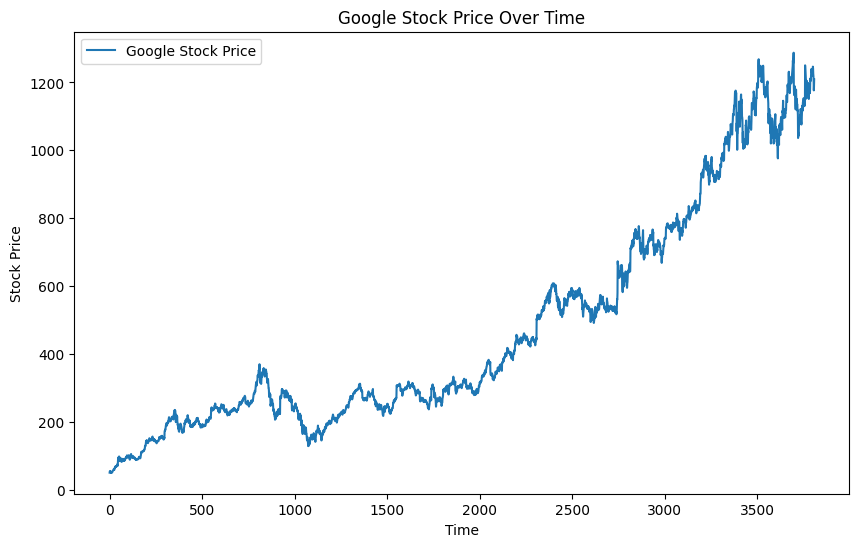

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Over Time')
plt.legend()
plt.show()


In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(data['Close']).reshape(-1, 1))

In [ ]:
# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [ ]:
# Function to create dataset with time steps
def create_dataset(data, time_step):
  X, y = [], []
  for i in range(len(data) - time_step - 1):
    X.append(data[i:(i + time_step), 0])
    y.append(data[i + time_step, 0])
  return np.array(X), np.array(y)

In [ ]:
# Define time steps and create train and test datasets
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
# Reshape data for LSTM input [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build LSTM model
model = Sequential([
LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
LSTM(50),
Dense(1)
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Measure training time
start_time = time.time()

In [ ]:
# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
47/47 [==============================] - 11s 132ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 2/50
47/47 [==============================] - 6s 135ms/step - loss: 1.7302e-04 - val_loss: 7.2716e-04
Epoch 3/50
47/47 [==============================] - 6s 123ms/step - loss: 1.4988e-04 - val_loss: 7.7471e-04
Epoch 4/50
47/47 [==============================] - 7s 148ms/step - loss: 1.4777e-04 - val_loss: 7.0916e-04
Epoch 5/50
47/47 [==============================] - 6s 125ms/step - loss: 1.4497e-04 - val_loss: 6.9808e-04
Epoch 6/50
47/47 [==============================] - 7s 144ms/step - loss: 1.4191e-04 - val_loss: 0.0011
Epoch 7/50
47/47 [==============================] - 6s 120ms/step - loss: 1.3654e-04 - val_loss: 7.4981e-04
Epoch 8/50
47/47 [==============================] - 8s 168ms/step - loss: 1.2972e-04 - val_loss: 8.5357e-04
Epoch 9/50
47/47 [==============================] - 6s 121ms/step - loss: 1.2551e-04 - val_loss: 6.4786e-04
Epoch 10/50
47/47 [====================

In [ ]:
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

Training Time: 5588.9578421115875 seconds


In [ ]:
# Evaluate model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)


Train Loss: 0.0001902626536320895
Test Loss: 0.0021446209866553545


In [ ]:
# Measure prediction time
start_time = time.time()

In [ ]:
# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

21/21 [==============================] - 1s 23ms/step


In [ ]:
prediction_time = time.time() - start_time
print("Prediction Time:", prediction_time, "seconds")

Prediction Time: 31.6735680103302 seconds


In [ ]:
# Inverse scaling to get original stock prices
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

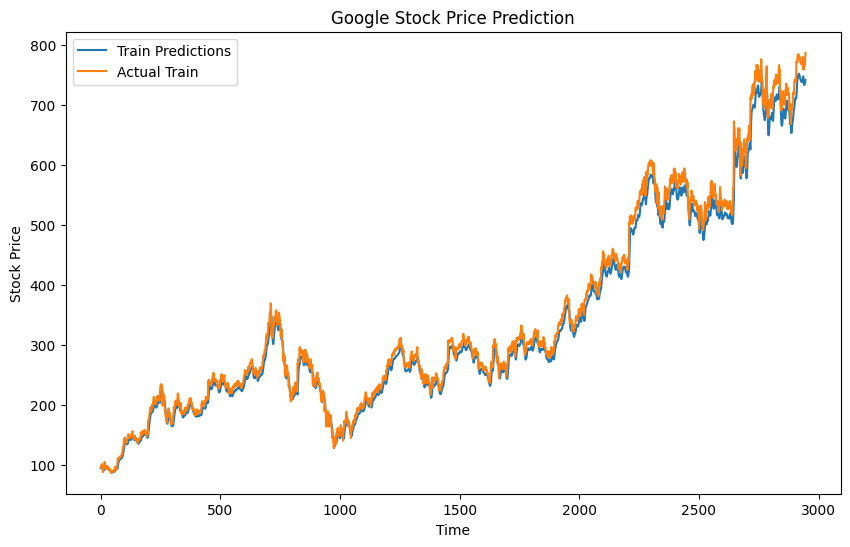

In [ ]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(train_predictions)], train_predictions, label='Train Predictions')
#plt.plot(data.index[len(train_predictions)+time_step:len(train_predictions)+time_step+len(test_predictions)], test_predictions, label=
plt.plot(data.index[:len(y_train.flatten())], y_train.flatten(), label='Actual Train')
#plt.plot(data.index[len(y_train.flatten())+time_step:len(y_train.flatten())+time_step+len(y_test.flatten())], y_test.flatten(), label=
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()


Text(0.5, 0, 'Time')

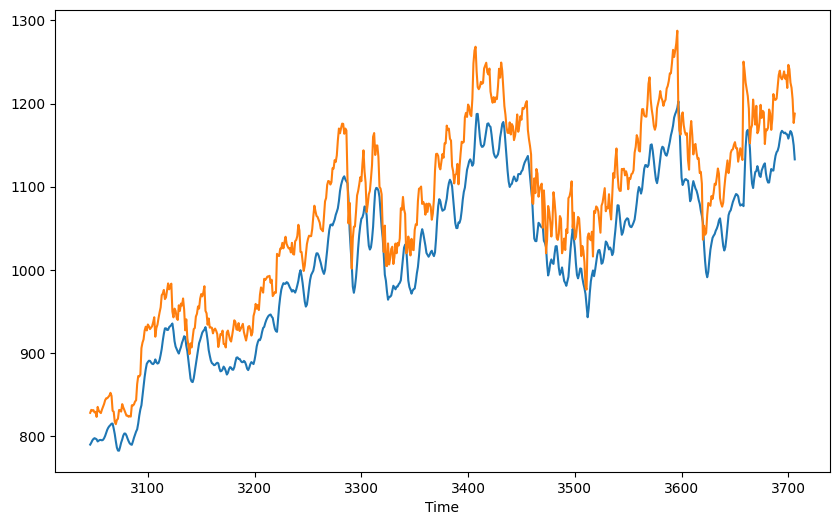

In [ ]:
# Plot predictions
plt.figure(figsize=(10, 6))
#plt.plot(data.index[:len(train_predictions)], train_predictions, label='Train Predictions')
plt.plot(data.index[len(train_predictions)+time_step:len(train_predictions)+time_step+len(test_predictions)], test_predictions, label='Test predictions')
#plt.plot(data.index[:len(y_train.flatten())], y_train.flatten(), label='Actual Train')
plt.plot(data.index[len(y_train.flatten())+time_step:len(y_train.flatten())+time_step+len(y_test.flatten())], y_test.flatten(), label='Actual test')
plt.xlabel('Time')


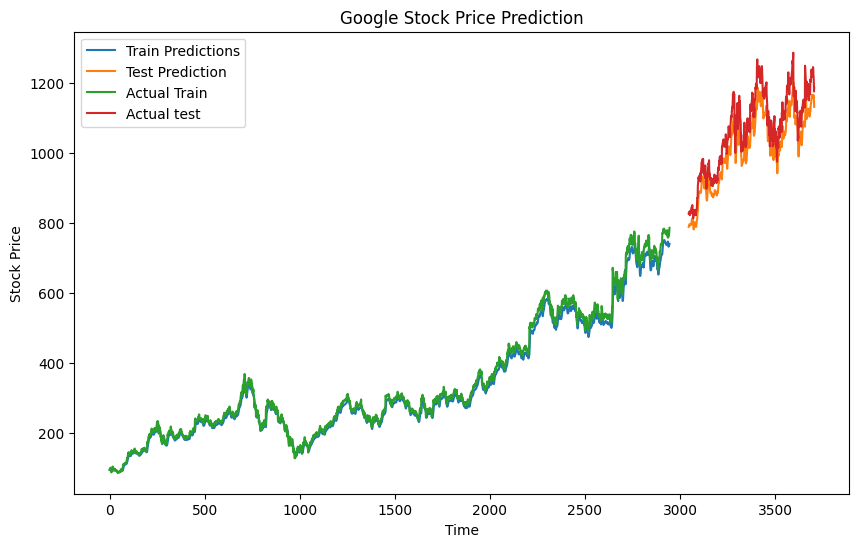

In [ ]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(train_predictions)], train_predictions, label='Train Predictions')
plt.plot(data.index[len(train_predictions)+time_step:len(train_predictions)+time_step+len(test_predictions)], test_predictions, label='Test Prediction')
plt.plot(data.index[:len(y_train.flatten())], y_train.flatten(), label='Actual Train')
plt.plot(data.index[len(y_train.flatten())+time_step:len(y_train.flatten())+time_step+len(y_test.flatten())], y_test.flatten(), label='Actual test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()
